In [137]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt

N = 300
n = 100
xi = np.linspace(0,1,N)

In [138]:
def sin(xi,c,v):
    if v == 0:
        V0 = V0_func(xi)
    if v == 1:
        V0 = V01_func(xi)
    if v == 2:
        V0 = V02_func(xi)

    return V0*np.sin(c * xi)

def potential_function(order, x, y):
    return np.sin(np.pi*order*x)*np.sinh(np.pi*order*y)

def V0_func(xi):
    return np.sin(4*np.pi*xi)

def V01_func(xi):
    return 1-(xi-0.5)**4

def V02_func(xi):
    return np.heaviside(xi-1/2,0)*np.heaviside(3/4-xi,0)

In [151]:
'''
Write a computer program that takes any function V0(x), and calculates V (x, y) inside the square tube.
It should be possible to choose to what order your Fourier series should be summed up to, in order to
investigate convergence issues.
'''
def calculate_potential(order, N, xi, ini = 0, convcheck = 0):
    V0_conv = 0
    V =  np.zeros((N,N))
    iteration = int(1)
    

    C_error = np.zeros(order-1)

    norm_array = np.zeros(order-1)
    while iteration < order:
    
        constant = iteration*np.pi
        C = quad(sin, 0,1, args=(constant,ini))

        C0 = 2/(np.sinh(iteration*np.pi))*C[0]
       
        C_error[iteration-1] = C[1]
            
        for i in range(N):                               
            for j in range(N):               
                V[i, j] += C0*potential_function(iteration,xi[j],xi[-i])

        if convcheck != 0:
            
            if ini == 0:
                V0_conv = V0_func(xi)
            if ini == 1:
                V0_conv = V01_func(xi)
            if ini == 2:
                V0_conv = V02_func(xi)
            norm = np.linalg.norm(V[1]-V0_conv,ord=2)
            norm_array[iteration-1] = norm

        iteration += 1  

    C_avg = np.sum(C_error)/len(C_error)
                    
    return V, C_avg, norm_array
    
    
    


### Potential sin(4 * pi * xi)

1.3549301687229913e-10


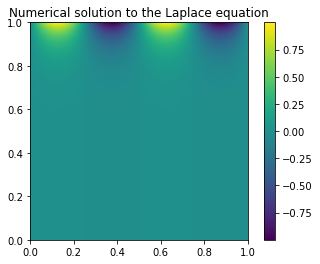

In [140]:
V0 = np.sin(4*np.pi*xi)
V,error,_ = calculate_potential(n, N, xi,0)
print(error)


plt.figure(1)
plt.imshow(V,extent=(0,1,0,1))
cb = plt.colorbar()
plt.title('Numerical solution to the Laplace equation')
#plt.savefig('/Users/simon/Downloads/sine_potential.png')
plt.show()



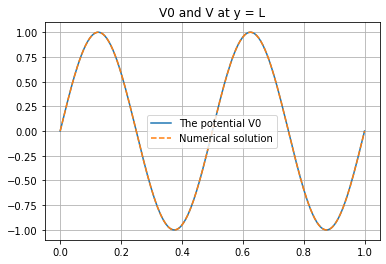

In [141]:
plt.plot(xi,V0,label='The potential V0')
plt.plot(xi,V[1],'--',label='Numerical solution')
plt.title('V0 and V at y = L')
plt.legend()
plt.grid()
#plt.savefig('/Users/simon/Downloads/sine_potential_vs_num.png')
plt.show()

### Potential 1 - (x - 0.5)**4

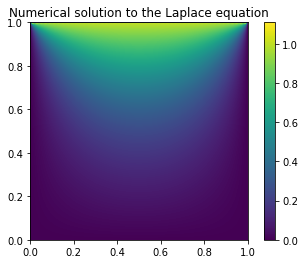

In [142]:
V02 = 1 - (xi - 0.5)**4
V2,error,_ = calculate_potential(n, N, xi,1)

plt.figure(2)

plt.imshow(V2,extent=(0,1,0,1))
cb = plt.colorbar()
plt.title('Numerical solution to the Laplace equation')
#plt.savefig('/Users/simon/Downloads/x_pot.png')
plt.show()



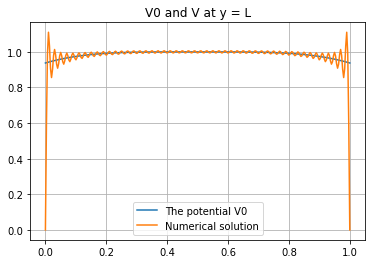

In [143]:
plt.plot(xi,V02,label='The potential V0')
plt.plot(xi,V2[1],label='Numerical solution')
plt.title('V0 and V at y = L')
plt.legend()
#plt.savefig('/Users/simon/Downloads/x_pot_vs_num.png')
plt.grid()
plt.show()

### Potential Heaviside

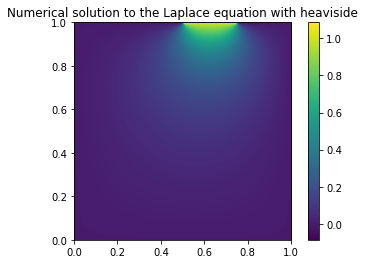

In [144]:
V03 = np.heaviside(xi-1/2,0)*np.heaviside(3/4-xi,0)
V3,error,_ = calculate_potential(n, N, xi,2)

plt.figure(3)
plt.imshow(V3,extent=(0,1,0,1))
cb = plt.colorbar()
plt.title('Numerical solution to the Laplace equation with heaviside')
#plt.savefig('/Users/simon/Downloads/heaviside.png')
plt.show()

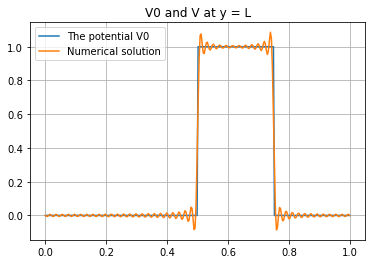

In [145]:
plt.plot(xi,V03,label='The potential V0')
plt.plot(xi,V3[1],label='Numerical solution')
plt.title('V0 and V at y = L')
plt.legend()
plt.grid()
#plt.savefig('/Users/simon/Downloads/heaviside_vs_num.png')
plt.show()

### Convergence tests

In [146]:

_,_,norm1 = calculate_potential(n, N, xi,0,1)
_,_,norm2 = calculate_potential(n, N, xi,1,1)
_,_,norm3 = calculate_potential(n, N, xi,2,1)


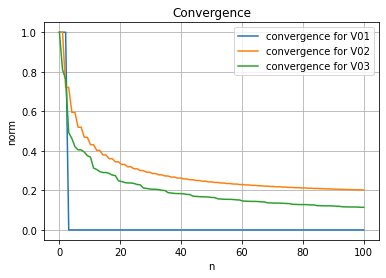

In [147]:
# PLOTTING 
n_list = np.linspace(0,100,99)

plt.plot(n_list,norm1/norm1[0],label='convergence for V01')
plt.plot(n_list,norm2/norm2[0],label='convergence for V02')
plt.plot(n_list,norm3/norm3[0],label='convergence for V03')

plt.ylabel('norm')
plt.xlabel('n')
plt.grid()
plt.legend()
plt.title('Convergence')
#plt.savefig('/Users/simon/Downloads/convergence.png')
plt.show()

### Find E-field

In [148]:
'''
To find the E-field we use that E = - gradient of V 
'''
def E(V, N,xi):
    delta = xi[1] - xi[0]
    Ex = -(V[1:N-1,2:N] - V[1:N-1,0:N-2])
    Ey = (V[2:N,1:N-1] - V[0:N-2,1:N-1])

    Ex[np.abs(Ex) > 10] = np.nan
    Ey[np.abs(Ey) > 10] = np.nan  
    

    return Ex/delta, Ey/delta

Ex, Ey = E(V,N,xi)
Ex1, Ey1 = E(V2,N,xi)
Ex2, Ey2 = E(V3,N,xi)

In [149]:
x = np.linspace(0,1,len(Ex))
y = np.linspace(0,1,len(Ey))
xv, yv = np.meshgrid(x,y)

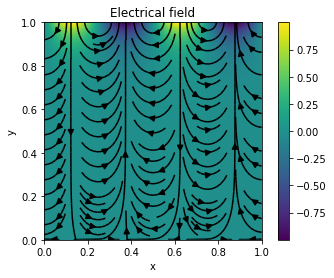

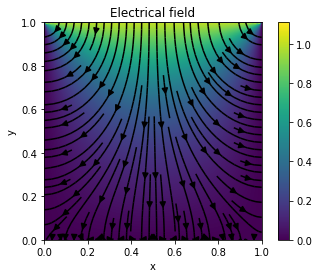

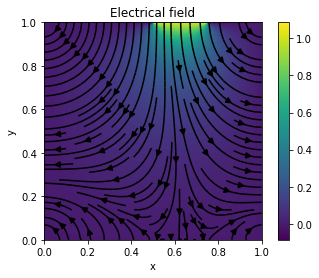

In [150]:
plt.streamplot(xv, yv, Ex, Ey, color='k', density=1, 
               arrowstyle='simple')
plt.xlabel('x')
plt.ylabel('y')
plt.imshow(V,extent=(0,1,0,1))
cb = plt.colorbar()
plt.title('Electrical field')
#plt.savefig('/Users/simon/Downloads/efieldsin.png')
plt.show()

plt.streamplot(xv, yv, Ex1, Ey1, color='k', density=1, 
               arrowstyle='simple')
plt.imshow(V2,extent=(0,1,0,1))
cb = plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Electrical field')
##plt.savefig('/Users/simon/Downloads/efieldx.png')
plt.show()

plt.streamplot(xv, yv, Ex2, Ey2, color='k', density=1, 
               arrowstyle='simple')
plt.imshow(V3,extent=(0,1,0,1))
cb = plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Electrical field')
#plt.savefig('/Users/simon/Downloads/efieldheavi.png')
plt.show()


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=cb916745-98f8-4a99-9581-20f9d36baa6e' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>